This example shows how to use perturbation evaluations. The procedure is the same as Deletion&Insertion. We show two interpreters SmoothGrad and LIME, with their evaluations.

# SG and Evaluation

We first get the explanation from `SmoothGradInterpreter`.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 19.60it/s]


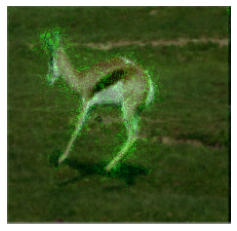

In [2]:
import interpretdl as it
from paddle.vision.models import resnet50
import paddle
device = 'gpu:0'
paddle.set_device(device)
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
sg = it.SmoothGradInterpreter(paddle_model, device=device)
exp = sg.interpret(
        img_path, 
        noise_amount=0.1,
        visual=True, 
        labels=None, 
        save_path=None)

In [4]:
evaluator = it.Perturbation(paddle_model, device)
r = evaluator.evaluate(img_path, exp)
print(r['MoRF_score'], r['LeRF_score'])

0.053546373 0.6992577


## Plots
We can plot the intermediate results of deletion and insertion.

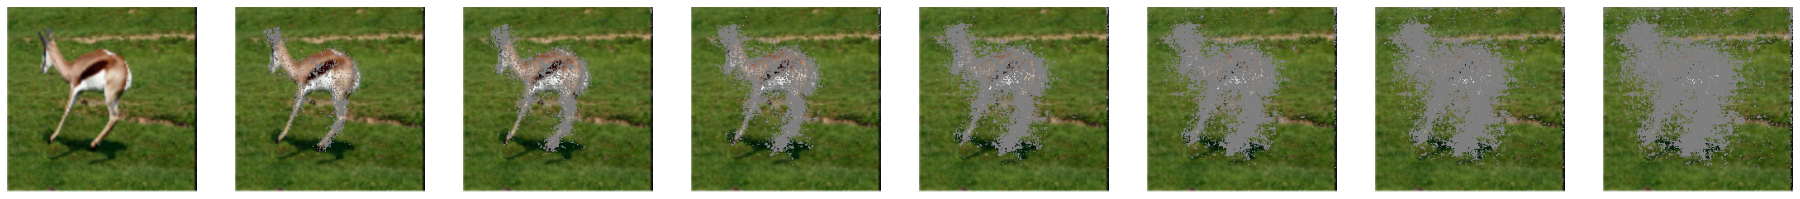

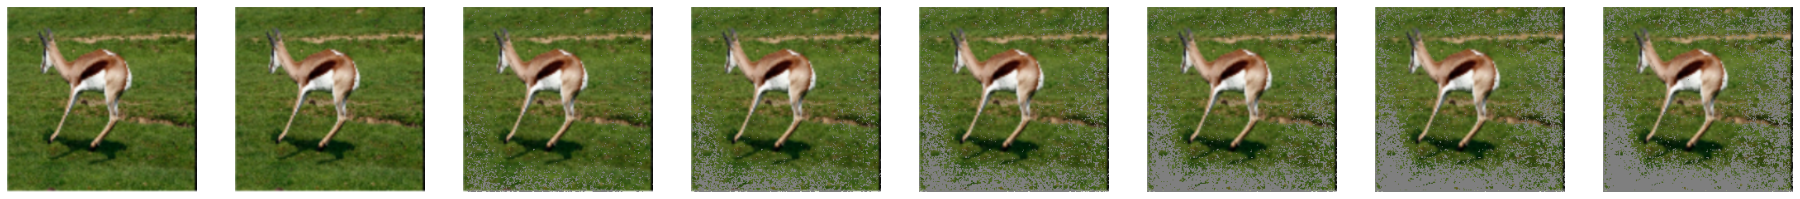

In [7]:
import matplotlib.pyplot as plt

psize = 4
show_images = 8
cols = show_images

# deletion
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['MoRF_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

# insertion
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['LeRF_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

# LIME and Evaluation

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:23<00:00, 127.73it/s]


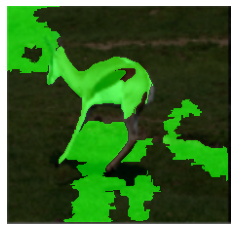

In [8]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
lime = it.LIMECVInterpreter(paddle_model, device=device)
lime_weights = lime.interpret(
    img_path,
    num_samples=3000,
    batch_size=50,
    visual=True,
    save_path=None
)

In [11]:
evaluator = it.Perturbation(paddle_model, device=device)
r = evaluator.evaluate(img_path, lime.lime_results, limit_number_generated_samples=20)
print(r['MoRF_score'], r['LeRF_score'])

0.059827913 0.7116211


# Plots

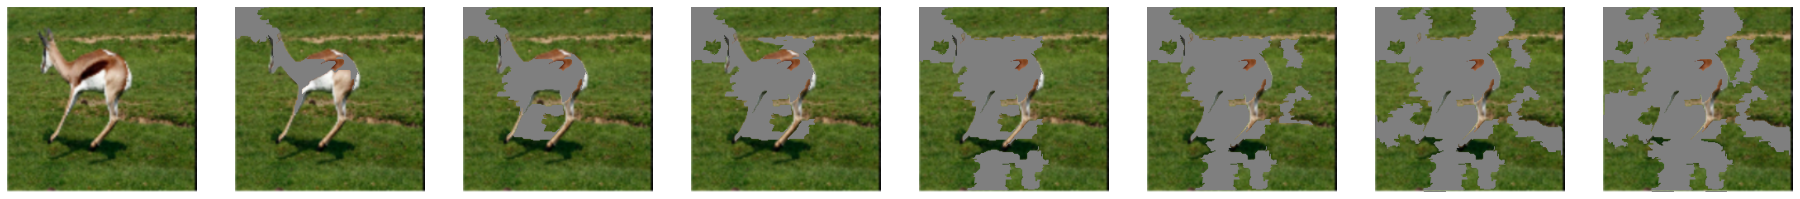

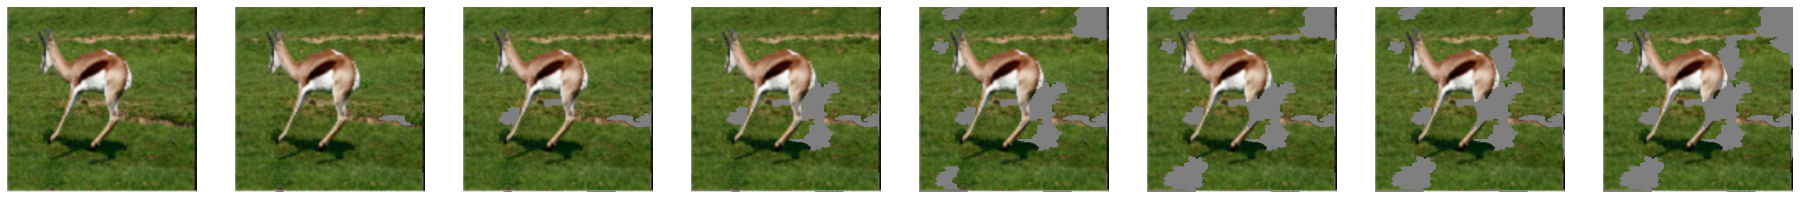

In [12]:
import matplotlib.pyplot as plt

psize = 4
show_images = 8
cols = show_images

# deletion
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['MoRF_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

# insertion
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['LeRF_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

Text(0.5, 1.0, 'LeRF Curve')

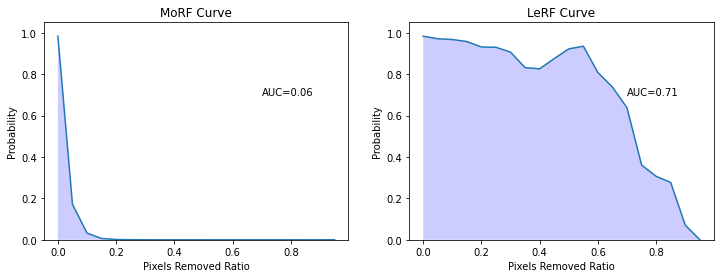

In [13]:
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(np.arange(len(r['MoRF_probas'])) / len(r['MoRF_probas']), r['MoRF_probas'])
axes[0].text(0.7, 0.7, f"AUC={np.mean(r['MoRF_probas']):.2f}")
axes[0].fill_between(x = np.arange(len(r['MoRF_probas'])) / len(r['MoRF_probas']),
                 y1 = 0,
                 y2 = r['MoRF_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
axes[0].set_ylim((0, 1.05))
axes[0].set_xlabel('Pixels Removed Ratio')
axes[0].set_ylabel('Probability')
axes[0].set_title('MoRF Curve')

axes[1].plot(np.arange(len(r['LeRF_probas'])) / len(r['LeRF_probas']), r['LeRF_probas'])
axes[1].text(0.7, 0.7, f"AUC={np.mean(r['LeRF_probas']):.2f}")
axes[1].fill_between(x = np.arange(len(r['LeRF_probas'])) / len(r['LeRF_probas']),
                 y1 = 0,
                 y2 = r['LeRF_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
axes[1].set_ylim((0, 1.05))
axes[1].set_xlabel('Pixels Removed Ratio')
axes[1].set_ylabel('Probability')
axes[1].set_title('LeRF Curve')